# Double MNIST Dotloss 

This file containts code for the experiment on double MNIST with dotloss

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Input
from tensorflow.keras.datasets import mnist
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras import initializers
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import np_utils
from tensorflow.keras.models import load_model
import tensorflow as tf
import time
import keras
from math import log
print(keras.__version__)
%tensorflow_version 2.x
%matplotlib inline 
from sklearn.utils import shuffle

2.5.0


In [ ]:
%xmode Plain
%pdb on

Exception reporting mode: Plain
Automatic pdb calling has been turned ON


In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32').reshape((x_train.shape[0], 28, 28))
x_test = x_test.astype('float32').reshape((x_test.shape[0], 28, 28))
print('x_train: ', x_train.shape)
# x_train, y_train = shuffle(x_train, y_train)

x_train /= 255
x_test /= 255

num_rows = 28
num_cols = 28
num_channels = 1
num_classes = 10
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

11493376/11490434 [==============================] - 0s 0us/step
x_train:  (60000, 28, 28)


double mnist


2000 of 60000
3000 of 60000
4000 of 60000
5000 of 60000
6000 of 60000
7000 of 60000
8000 of 60000
9000 of 60000
10000 of 60000
11000 of 60000
12000 of 60000
13000 of 60000
14000 of 60000
15000 of 60000
16000 of 60000
17000 of 60000
18000 of 60000
19000 of 60000
20000 of 60000
21000 of 60000
22000 of 60000
23000 of 60000
24000 of 60000
25000 of 60000
26000 of 60000
27000 of 60000
28000 of 60000
29000 of 60000
30000 of 60000
31000 of 60000
32000 of 60000
33000 of 60000
34000 of 60000
35000 of 60000
36000 of 60000
37000 of 60000
38000 of 60000
39000 of 60000
40000 of 60000
41000 of 60000
42000 of 60000
43000 of 60000
44000 of 60000
45000 of 60000
46000 of 60000
47000 of 60000
48000 of 60000
49000 of 60000
50000 of 60000
51000 of 60000
52000 of 60000
53000 of 60000
54000 of 60000
55000 of 60000
56000 of 60000
57000 of 60000
58000 of 60000
59000 of 60000
(30000, 28, 56)
(30000, 10)


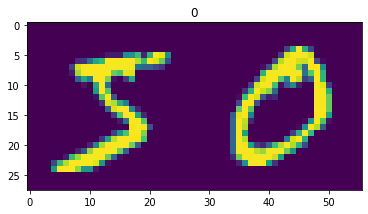

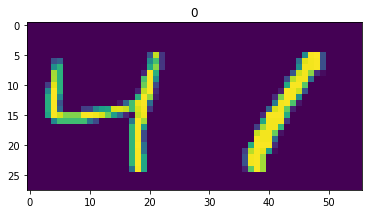

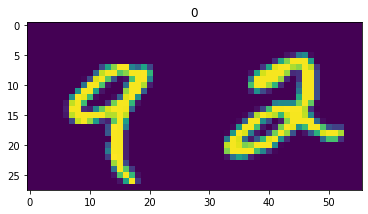

In [ ]:
im1 = x_train[0]
im2 = x_train[1]

joined_dataset = []
joined_labels = []

for i in range(0, 60000, 2):
  if i % 1000 == 0 and i > 1000:
    print(i, 'of 60000')
  im1 = x_train[i]
  im2 = x_train[i+1]
  label1 = y_train[i]
  label2 = y_train[i+1]

  joined_image = np.concatenate((im1, im2), axis=1)
  joined_label = np.array((label1, label2))

  joined_dataset.append(joined_image)
  # joined_labels.append(joined_label)
  joined_labels.append(label2)

joined_dataset = np.array(joined_dataset)
joined_labels = np.array(joined_labels)
print(joined_dataset.shape)
print(joined_labels.shape)

for i in range(3):
  plt.imshow(joined_dataset[i])
  plt.title(str(np.argmax(joined_labels[i][1])))
  plt.show()


# im3 = np.concatenate((im1, im2), axis=1)
# joined_dataset = np.concatenate((x_train[0:30000], x_train[30000:60000]), axis=2)
# i = 0
# i2 = i + 30000
# joined_labels = []
# for i in range(30000):
#   label = np.append(np.argmax(y_train[i]), np.argmax(y_train[i+30000]))
#   joined_labels.append(label)


Add noise to test/train dataset

In [ ]:
mu = 0.15
sigma = 0.15
x_train += np.random.normal(mu, sigma, x_train.shape)
x_test += np.random.normal(mu, sigma, x_test.shape)
print(x_train.min(), x_train.max())

-0.6915779 1.8939991


0.0 1.0


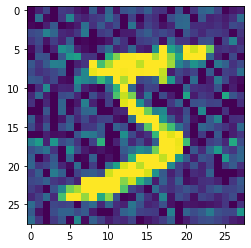

In [ ]:
x_train = np.clip(x_train, 0, 1)
x_test = np.clip(x_test, 0, 1)
print(x_train.min(), x_test.max())
plt.imshow(x_train[0].reshape(28,28))
plt.show()

Fully Connected Neural Network

In [ ]:
# Here we define our model as a sequential neural network
def get_model():
  model = Sequential()
  model.add(Flatten(input_shape=(28, 56)))

  model.add(Dense(512, kernel_initializer='random_uniform',
                      bias_initializer=initializers.Constant(0.1)))
  model.add(Activation('relu'))

  model.add(Dense(512, kernel_initializer='random_uniform',
                      bias_initializer=initializers.Constant(0.1)))
  model.add(Activation('relu'))

  model.add(Dense(256, kernel_initializer='random_uniform',
                      bias_initializer=initializers.Constant(0.1)))
  model.add(Activation('relu'))

  model.add(Dense(256, kernel_initializer='random_uniform',
                      bias_initializer=initializers.Constant(0.1)))
  model.add(Activation('relu'))

  model.add(Dense(num_classes))
  model.add(Activation('softmax'))

  return model

def calc_acc(model_name, data, test_set):
  preds = model_name.predict(data)
  score = 0
  for i in range(len(data)):
    pred = preds[i]
    target = test_set[i]
    if np.argmax(pred) == np.argmax(target):
      score += 1

  print("Acc:", score, 'of', len(x_test))
  return score/len(x_test)

model = get_model()
model.summary()
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 1568)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               803328    
_________________________________________________________________
activation (Activation)      (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
activation_2 (Activation)    (None, 256)               0


Training loop for constrained network

This code trains

1.   Calculate prediction loss
2.   Retrieve intermediate neuron activity of target layer
3.   Calculate gradient of target layer w.r.t input
4.   For each neuron compute v from ICD
5.   For each v calculate neuron distraction score according to input mask
6.   Minimise loss as pred + mask_score



In [ ]:
# changed to function to use tf.function to make it faster
# how many output neurons there are in the target layer, used to visualise gradients etc.
# x_train = joined_dataset
# y_train = joined_labels[:,2]
x_test = joined_dataset
y_test = joined_labels
@tf.function
def relu(x, x_intercept=0, positive=True):
  if positive:
    return x * (x > x_intercept)
  else:
    return x * (x < x_intercept)
model = get_model()
model.summary()
# conv = True # whether or not we are using convnet

optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-4)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
# model.fit(x_train.reshape(60000,28,28,1), y_train, epochs=3, batch_size=32)
# optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001) # not 0.01 - too fast and can nan
# model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
# conv = False # True
model_losses = []
acc_losses = []
w_losses = []
c_losses = []
v_losses = []
joint_losses = []
dot_losses = []
# parameters
# interpretability mask term
alpha = 1.0
alpha = tf.convert_to_tensor(alpha, dtype=tf.float32)
conv = False
if conv:
  target_layer = len(model.layers)-1
else:
  target_layer = len(model.layers)-1
n_neurons = model.layers[target_layer].output.shape[-1]
print("Looking at", n_neurons, "neurons in layer", target_layer, model.layers[target_layer].name)
# define a model that lets us get at the internal activations
aux_model = tf.keras.Model(inputs=model.inputs,
                           outputs=[model.layers[target_layer].output[:, i] for i in range(n_neurons)])
start_time = time.time()
# define training step
@tf.function
def step(X, y, batch_size, model, aux_model, target_layer, target_neurons):
  """
  x_batch: input images
  y_batch: correct labels
  batch_size: can be inferred from x_batch
  model: the predicting model to train
  aux_model: the extra model that outputs the target layer of model
  target_layer: which layer to examine
  neuron_mode: target all neurons in the layer or just class neuron (if output layer)
  """
 
  def tf_relu(data, intercept=tf.constant(0.0), positive=True):
    if positive:
      return tf.math.multiply(data, tf.cast(tf.math.greater(data, intercept), tf.float32))
    else:
      return tf.math.multiply(data, tf.cast(tf.math.less(data, intercept), tf.float32))
  with tf.GradientTape(persistent=True) as tape:
    # get predictions and calculate acc loss for the batch
    preds = model(X)
    losses = tf.keras.losses.categorical_crossentropy(y, preds)

    # Get internal activations from aux model
    # x = tf.convert_to_tensor(X, dtype=tf.float32)
    if conv:
      x = tf.reshape(X, (batch_size, 28, 56, 1))
    else:
      x = tf.reshape(X, (batch_size, 28, 56))
    with tf.GradientTape(persistent=True) as aux_tape:
      # this is activations at target_layer
      aux_tape.watch(x)
      neuron_activations = aux_model(x)  # eq 1

    # compute gradients w.r.t from neurons in target layer
    # a bit of wasted computation here as all neuron gradients in the layer are
    # calculated even if we don't use them all...
    grad_maps = []
    for neuron in neuron_activations:
      # local grad maps are (28, 28) images to input
      grad_maps.append(aux_tape.gradient(neuron, x))
    grad_maps = tf.reshape(grad_maps, (batch_size, n_neurons, 28*56))
    X = tf.reshape(x, (batch_size, 28*56,))
    neuron_activations = tf.reshape(neuron_activations, (batch_size, n_neurons))

    w_scale_losses = []
    c_scale_losses = []
    v_scale_losses = []
    dot_losses = []
    joint_losses = []
    wxwc_losses = []
    # Caclulate v from neuron-input gradients
    for batch in range(batch_size):
      x = X[batch]
      # which output neuron to use
      target_neuron = target_neurons[batch]
      w_hat = tf.reshape(grad_maps[batch][target_neuron], (28*56,))  # eq 4
      b_hat = tf.math.subtract(neuron_activations[batch][target_neuron], tf.multiply(x[batch], tf.transpose(w_hat)))  # eq 5
      v = tf.math.add(tf.multiply(w_hat, x[batch]), b_hat)  # eq 2
      # c_hat = tf.math.subtract(x[batch], tf.tensordot(tf.math.divide(v , (tf.tensordot(w_hat, tf.transpose(w_hat), axes=1))), w_hat, axes=1))  # CHECK AXES is 1 for both
      # print('v * w_hat')
      # print(v.shape)
      # print(w_hat.shape)
      # print(tf.math.multiply(v, w_hat))
      # print('vw / stop norm w_hat')
      # vw = tf.math.multiply(v, w_hat)
      # print('top', vw)
      # print('bot', tf.linalg.normalize(w_hat, axis=1))
      # print(tf.math.divide(vw, tf.stop_gradient(tf.linalg.normalize(w_hat))))
      # print('x  - ...')
      # print(tf.math.subtract(x[batch], tf.math.divide(tf.math.multiply(v, w_hat), tf.stop_gradient(tf.linalg.normalize(w_hat)))))
      c_hat = tf.math.subtract(x[batch], tf.math.divide(tf.math.multiply(v, w_hat), tf.clip_by_value(tf.stop_gradient(tf.linalg.normalize(w_hat)[0]), 1e-8, 1e8)))  # CHECK AXES is 1 for both
      # print('chat', c_hat.shape)
      v_hat = tf.math.multiply(tf.math.subtract(x[batch], c_hat), w_hat)  # eq 8
      # print('vhat', v_hat.shape)

      v = tf.transpose(v_hat)
      # we have v = w(x-c)
      # 1. every element component of w and c is between 0 and 1
      w_scale_loss_neg = tf.reduce_sum(tf.abs(tf_relu(w_hat, intercept=tf.constant(0.0), positive=False)))
      w_scale_loss_pos = tf.reduce_sum(tf.abs(tf_relu(w_hat, intercept=tf.constant(1.0), positive=True)))
      w_scale_loss = tf.math.square(tf.add(w_scale_loss_neg, w_scale_loss_pos))

      c_scale_loss_neg = tf.reduce_sum(tf.abs(tf_relu(c_hat, intercept=tf.constant(0.0), positive=False)))
      c_scale_loss_pos = tf.reduce_sum(tf.abs(tf_relu(c_hat, intercept=tf.constant(1.0), positive=True)))
      c_scale_loss = tf.add(c_scale_loss_neg, c_scale_loss_pos)

      v_scale_loss_neg = tf.reduce_sum(tf.abs(tf_relu(v_hat, intercept=tf.constant(0.0), positive=False)))
      v_scale_loss_pos = tf.reduce_sum(tf.abs(tf_relu(v_hat, intercept=tf.constant(1.0), positive=True)))
      v_scale_loss = tf.math.abs(tf.add(v_scale_loss_neg, v_scale_loss_pos))

      w_scale_losses.append(w_scale_loss)
      c_scale_losses.append(c_scale_loss)
      v_scale_losses.append(v_scale_loss)
      # 2. the dot product of w and c is zero.
      dot_loss = tf.math.abs(tf.tensordot(w_hat, c_hat, axes=0))
      dot_losses.append(dot_loss)


      # wx wc dot
      wxwc_dot_loss = tf.math.abs(tf.tensordot(tf.multiply(w_hat, x), tf.multiply(w_hat, c_hat), axes=0))
      wxwc_losses.append(wxwc_dot_loss)
      # print(wxwc_dot_loss, 'wxwc_dot_loss')
      # 3. w+c = x
      joint_loss = tf.math.abs(tf.math.subtract(x, tf.math.add(w_hat, c_hat)))
      joint_losses.append(joint_loss)
      # acc loss
      loss = tf.math.reduce_mean(losses)
      # constraint losses
      w_scale_loss = tf.math.reduce_mean(w_scale_losses)
      c_scale_loss = tf.math.reduce_mean(c_scale_losses)
      v_scale_loss = tf.math.reduce_mean(v_scale_losses)
      dot_loss = tf.math.reduce_mean(dot_losses)
      joint_loss = tf.math.reduce_mean(joint_losses)
      wxwc_dot_loss = tf.math.reduce_mean(wxwc_losses)

      # overall loss to train on
      # model_loss = tf.reduce_sum([loss, w_scale_loss, c_scale_loss, dot_loss, joint_loss])
      # end tape
      model_losses = [tf.multiply(tf.constant(1.0),loss), 
                      tf.multiply(tf.constant(0.0),w_scale_loss), 
                      tf.multiply(tf.constant(0.0),c_scale_loss), 
                      tf.multiply(tf.constant(0.0),v_scale_loss), 
                      tf.multiply(tf.constant(1.0),dot_loss), 
                      tf.multiply(tf.constant(0.0),joint_loss),
                      tf.multiply(tf.constant(0.0),wxwc_dot_loss)
                      ]
      # model_losses = [tf.multiply(tf.constant(10.0),loss), 
      #                 tf.multiply(tf.constant(1.0),w_scale_loss), 
      #                 tf.multiply(tf.constant(0.5),c_scale_loss), 
      #                 tf.multiply(tf.constant(0.0),v_scale_loss), 
      #                 tf.multiply(tf.constant(1.0),dot_loss), 
      #                 tf.multiply(tf.constant(0.05),joint_loss)]
      model_loss= tf.reduce_sum(model_losses)

  # learn
  grads = tape.gradient(model_loss, model.trainable_variables)
  optimizer.apply_gradients(zip(grads, model.trainable_variables))
  return loss, model_losses


# training loop
batch_size = 64
n_batches = 30000//64
max_images = batch_size * n_batches
epochs = 6
for e in range(epochs):
  for i in range(0, max_images, batch_size):
    # training stats
    print("Epoch", e, 'of', str(epochs-1), "Batch", str(i / batch_size), 'of', str(max_images / batch_size))
    elapsed_time = time.time() - start_time
    elapsed_time_str = time.strftime("%H:%M:%S", time.gmtime(elapsed_time))
    progress = i / max_images * 100
    total_time_estimated = elapsed_time / (i + 1 + e * i) * (max_images * epochs+ 1) 
    

    # Start training batch
    # if conv:
    #   x = x_train[i:i + batch_size].reshape(batch_size, 28, 56, 1)
    # else:
    #   x = x_train[i:i + batch_size].reshape(batch_size, 28, 56)
    # y = y_train[i:i + batch_size]
    # target_neurons = np.argmax(y, axis=1)


    if conv:
      x_train = joined_dataset
      y_train = joined_labels
      x = x_train[i:i + batch_size].reshape(batch_size, 28, 56, 1)
    else:
      x_train = joined_dataset
      y_train = joined_labels
      x = x_train[i:i + batch_size].reshape(batch_size, 28, 56)
    y = y_train[i:i + batch_size]#[1]
    target_neurons = np.argmax(y, axis=1)


    X = tf.convert_to_tensor(x, dtype=tf.float32)
    Y = tf.convert_to_tensor(y, dtype=tf.float32)
    # call function
    # step(x, y, model, aux_model, target_layer)
    loss, model_loss = step(X, Y, batch_size, model, aux_model, target_layer, target_neurons)

    loss, w_scale_loss, c_scale_loss, v_scale_loss, dot_loss, joint_loss, wxwc_dot_loss = model_loss
    print('loss', loss)
    print('w_scale_loss', w_scale_loss)
    print('c_scale_loss', c_scale_loss)
    print('v_scale_loss', v_scale_loss)

    print('dot_loss', dot_loss)
    print('joint_loss', joint_loss)
    print('wxwc_dot_loss', wxwc_dot_loss)
    # report
    print("Time: ", elapsed_time_str, 'out of estimated:', time.strftime("%H:%M:%S", time.gmtime(total_time_estimated)),
      'time remaining:', str(time.strftime("%H:%M:%S", time.gmtime(total_time_estimated - elapsed_time))))
    print('Model loss:', model_loss)
    print('Acc loss:', loss)
    calc_acc(model, joined_dataset, joined_labels)
    print()
    model_losses.append(model_loss + loss)  # sum(model_loss)/len(model_loss))
    # neg_losses.append(model_loss)
    acc_losses.append(loss)
    w_losses.append(w_scale_loss)
    c_losses.append(c_scale_loss)
    v_losses.append(v_scale_loss)
    dot_losses.append(dot_loss)
    joint_losses.append(joint_loss)
    

  # save and report sometimes
  # if i / batch_size % 100 == 0 and i / batch_size > 100:
    # plot batch v's
    # V = np.array(V).reshape(batch_size, n_neurons, 28, 28) # layer of neurons
    # V2 = np.array(V).reshape(batch_size, 28, 28) # single neuron
    # for v in V2:
    #   # v = np.array(v).reshape(28, 28)
    #   v /= np.max(np.abs(v))
    # f, axarr = plt.subplots(8, 4, figsize=(10, 10))
    # for i in range(batch_size):
    #   axarr[i % 8, i // 8].imshow(V2[i], cmap='seismic') # single neuron
    #   # axarr[i % 8, i // 8].imshow(V[i][0], cmap='seismic') # layer
    # plt.show()
    
  # filename = str(e) + '_batch_' + str(i/batch_size) + '.h5'
  filename = str(e) + '_batch.h5'
  special = 'dot_cw_2'
  filename = special + filename
  model.save(filename) 
if conv:
  calc_acc(model, x_test.reshape(10000, 28, 56, 1), y_test)
else:
  calc_acc(model, x_test.reshape(10000, 28, 56), y_test)
model_losses, acc_losses = np.array(model_losses), np.array(acc_losses)
filename = 'latest_model.h5'
model.save(filename)
# V = np.array(V).reshape(batch_size, 28, 28) # single neuron
# for v in V:
#   # v = np.array(v).reshape(28, 28)
#   v /= np.max(np.abs(v))
# f, axarr = plt.subplots(8, 4, figsize=(10, 10))
# for i in range(batch_size):
#   axarr[i % 8, i // 8].imshow(V[i], cmap='seismic') # single neuron
#   # axarr[i % 8, i // 8].imshow(V[i][0], cmap='seismic') # layer
# plt.show()


Streaming output truncated to the last 5000 lines.
joint_loss tf.Tensor(0.0, shape=(), dtype=float32)
wxwc_dot_loss tf.Tensor(0.0, shape=(), dtype=float32)
Time:  00:02:24 out of estimated: 02:42:39 time remaining: 02:40:15
Model loss: [<tf.Tensor: shape=(), dtype=float32, numpy=2.1278434>, <tf.Tensor: shape=(), dtype=float32, numpy=0.0>, <tf.Tensor: shape=(), dtype=float32, numpy=0.0>, <tf.Tensor: shape=(), dtype=float32, numpy=0.0>, <tf.Tensor: shape=(), dtype=float32, numpy=0.0950558>, <tf.Tensor: shape=(), dtype=float32, numpy=0.0>, <tf.Tensor: shape=(), dtype=float32, numpy=0.0>]
Acc loss: tf.Tensor(2.1278434, shape=(), dtype=float32)
Acc: 19737 of 30000

Epoch 0 of 5 Batch 84.0 of 937.0
loss tf.Tensor(2.0914328, shape=(), dtype=float32)
w_scale_loss tf.Tensor(0.0, shape=(), dtype=float32)
c_scale_loss tf.Tensor(0.0, shape=(), dtype=float32)
v_scale_loss tf.Tensor(0.0, shape=(), dtype=float32)
dot_loss tf.Tensor(0.09830078, shape=(), dtype=float32)
joint_loss tf.Tensor(0.0, shape=

ValueError: ignored

In [ ]:
model.save("double_dotloss.h5")

# SLP interpretability code

In [ ]:
# model.fit(x_train, y_train, epochs=10, verbose=1, batch_size=64)
def tf_relu(data, intercept=tf.constant(0.0), positive=True):
    if positive:
      return tf.math.multiply(data, tf.cast(tf.math.greater(data, intercept), tf.float32))
    else:
      return tf.math.multiply(data, tf.cast(tf.math.less(data, intercept), tf.float32))
def perform_SVD(X, model, target_layer, aux_model):
    # print(x.shape, x)
    # print(model.input.shape)
    # print('modelpred:', model.predict(x))
    X = tf.convert_to_tensor(X)
    # print(x)
    # print('tesnorpred:', model.predict(x))

    img_rows = 28
    img_cols = 56

    # feed in images and record activations
    # print("Retrieving Neuron Activations")
    with tf.GradientTape(persistent=True) as tape:
        # track the input to see how it changes
        tape.watch(X)
        # retrieve output prediction and hidden layer we specified in aux_model
        neuron_activations = aux_model(X)  # eq 1

    # neuron activations shape is (batch_size, neuron_size)
    # print(np.argmax(model.predict(x)), 'was the predicted class')
    # calculate gradients for each neuron w.r.t. input
    grad_maps = []
    print("Retrieving neuron gradients w.r.t. input")

    for neuron in neuron_activations:
        # local grad maps are (28, 28) images
        grad_maps.append(tape.gradient(neuron,X))

    grad_maps = np.array(grad_maps)
    print("Calculated grad_maps of shape:", grad_maps.shape)


    # numpyify the gradients and reshape tensors to get reduce unneeded dimensions
    grad_maps = grad_maps.reshape(len(X), n_neurons, img_rows * img_cols * 1)
    X = X.numpy().reshape(len(X), (img_rows * img_cols * 1))

    neuron_activations = np.array(neuron_activations).reshape(len(X), n_neurons, )

    V_batch = []
    for i in range(len(X)):
      x = X[i]
      # compute w_hat, b_hat and V
      V = []
      for neuron in range(n_neurons):
          # switched weight vector
          w_hat = grad_maps[i][neuron]  # eq 4
          # switched bias vector
          b_hat = neuron_activations[i][neuron] - x * np.transpose(w_hat)  # eq 5

          v = w_hat * x + b_hat  # eq 2
          # note that this is equal to the neuron activation here but as a (28, 28) matrix?
          # v is a (28, 28) shape but almost all same value
          # ICD
          # many values are -inf or nan here?
          c_hat = x - np.dot(v / (np.dot(w_hat, np.transpose(w_hat))), w_hat)  # eq 9
          c_hat = np.nan_to_num(c_hat)
          v_hat = (x - c_hat) * w_hat  # eq 8

          # V.append(np.transpose(-c_hat*w_hat))  # eq 11
          # local_V.append(np.transpose(x*w_hat))
          V.append(np.transpose(v_hat))  # eq 11
      V_batch.append(V)

    # now we have calculated switched weight vectors for each neuron
    V = np.array(V_batch)
    V = V.transpose()
    #V -= np.mean(V)
    print('V shape after transpose before svd', V.shape)
    V = V.reshape(batch_size, 28*56, n_neurons)
    u = []
    s = []
    vh = []
    for i in range(len(X)):
      print("Performing SVD", i, 'of', len(X))
      u1, s1, vh1 = np.linalg.svd(V[i], full_matrices=False)  # eq 12
      u.append(u1)
      s.append(s1)
      vh.append(vh1)
    
    u = np.array(u)
    s = np.array(s)
    vh = np.array(vh)
    print('U shape before returning', u.shape)
    print(u.shape, s.shape, vh.shape)
    
    return u, s, vh

Retrieving neuron gradients w.r.t. input
Calculated grad_maps of shape: (10, 1, 28, 56, 1)
V shape after transpose before svd (1568, 10, 1)
Performing SVD 0 of 1
U shape before returning (1, 1568, 10)
(1, 1568, 10) (1, 10) (1, 10, 10)
U shape before transpose: (1, 1568, 10)
U shape after transpose (10, 1568, 1)
s shape (1, 10)
Retrieving neuron gradients w.r.t. input
Calculated grad_maps of shape: (10, 1, 28, 56, 1)
V shape after transpose before svd (1568, 10, 1)
Performing SVD 0 of 1
U shape before returning (1, 1568, 10)
(1, 1568, 10) (1, 10) (1, 10, 10)
U shape before transpose: (1, 1568, 10)
U shape after transpose (10, 1568, 1)
s shape (1, 10)
Retrieving neuron gradients w.r.t. input
Calculated grad_maps of shape: (10, 1, 28, 56, 1)
V shape after transpose before svd (1568, 10, 1)
Performing SVD 0 of 1
U shape before returning (1, 1568, 10)
(1, 1568, 10) (1, 10) (1, 10, 10)
U shape before transpose: (1, 1568, 10)
U shape after transpose (10, 1568, 1)
s shape (1, 10)
Retrieving ne

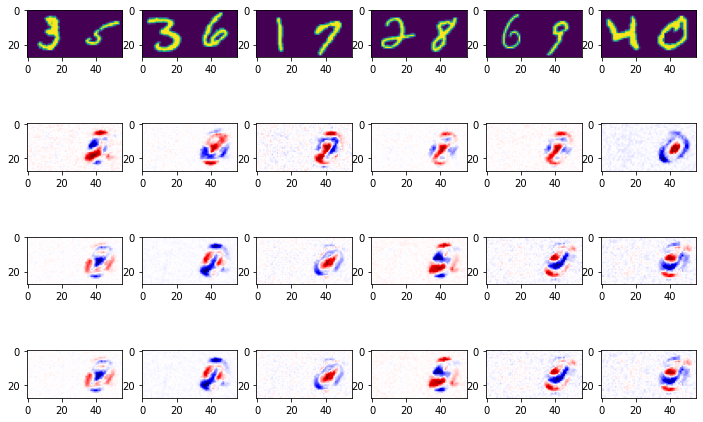

In [ ]:
from tensorflow.keras.models import load_model
# model = load_model('training_mask_2500_images_a=0.6169.h5')
# compare activation similarity
conv = False
def get_activations(X, model, target_layer, aux_model):
    X = tf.convert_to_tensor(X)
 
    # feed in images and record activations
    print("Retrieving Neuron Activations")
    with tf.GradientTape(persistent=True) as tape:
        # track the input to see how it changes
        tape.watch(X)
        # retrieve output prediction and hidden layer we specified in aux_model
        neuron_activations = aux_model(X)  # eq 1

    neuron_activations = np.array(neuron_activations).reshape(len(X), n_neurons, )

    return neuron_activations

# calc_acc(model, x_test)

# model_normal = get_model()
# optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
# model_normal.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
# n = 60000
# model_normal.fit(x_train.reshape(60000, 28, 28, 1), y_train, epochs=1)
# calc_acc(model_normal, x_test.reshape(10000, 28, 28, 1), y_test)
#img = add_noise(img)
batch_size = 1
target_layer = len(model.layers) - 1# 9
n_neurons = model.layers[target_layer].output.shape[-1]
# define a model that lets us get at the internal activations
aux_model = tf.keras.Model(inputs=model.inputs,
                            outputs=[model.layers[target_layer].output[:, i] for i in range(n_neurons)])



# print('u shape', u.shape)
f, axarr = plt.subplots(4, 6, figsize=(12, 8))
for i in range(6):
  img = joined_dataset[i+5:i+1+5].reshape(1, 28, 56, 1)
  # print("pred'", np.argmax(model(img)))
  target_neurons = np.argmax(joined_labels[i+5:i+1+5], axis=1)
  # img = img.reshape(1, 784)
  with tf.GradientTape(persistent=True) as tape:
    # get predictions and calculate acc loss for the batch
    X = img
    batch_size = 1
    preds = model(X)

    # Get internal activations from aux model
    # x = tf.convert_to_tensor(X, dtype=tf.float32)
    if conv:
      x = tf.reshape(X, (batch_size, 28, 56, 1))
    else:
      x = tf.reshape(X, (batch_size, 28, 56))
    with tf.GradientTape(persistent=True) as aux_tape:
      # this is activations at target_layer
      aux_tape.watch(x)
      neuron_activations = aux_model(x)  # eq 1

    # compute gradients w.r.t from neurons in target layer
    # a bit of wasted computation here as all neuron gradients in the layer are
    # calculated even if we don't use them all...
    grad_maps = []
    for neuron in neuron_activations:
      # local grad maps are (28, 28) images to input
      grad_maps.append(aux_tape.gradient(neuron, x))
    grad_maps = tf.reshape(grad_maps, (batch_size, n_neurons, 28*56))
    x = tf.reshape(x, (batch_size, 28*56,))
    neuron_activations = tf.reshape(neuron_activations, (batch_size, n_neurons))


    w_scale_losses = []
    c_scale_losses = []
    dot_losses = []
    joint_losses = []
    # Caclulate v from neuron-input gradients
    for batch in range(batch_size):
      # which output neuron to use
      target_neuron = target_neurons[batch]
      w_hat = tf.reshape(grad_maps[batch][target_neuron], (28*56,))  # eq 4
      b_hat = tf.math.subtract(neuron_activations[batch][target_neuron], tf.multiply(x[batch], tf.transpose(w_hat)))  # eq 5
      v = tf.math.add(tf.multiply(w_hat, x[batch]), b_hat)  # eq 2
      c_hat = tf.math.subtract(x[batch], tf.tensordot(v / (tf.tensordot(w_hat, tf.transpose(w_hat), axes=1)), w_hat, axes=1))  # CHECK AXES is 1 for both
      v_hat = tf.math.multiply(tf.math.subtract(x[batch], c_hat), w_hat)  # eq 8
      v = tf.transpose(v_hat)

      # # we have v = w(x-c)
      # # 1. every element component of w and c is between 0 and 1
      # w_scale_loss_neg = tf.reduce_sum(tf.abs(tf_relu(w_hat, intercept=tf.constant(0.0), positive=False)))
      # w_scale_loss_pos = tf.reduce_sum(tf.abs(tf_relu(w_hat, intercept=tf.constant(1.0), positive=True)))
      # w_scale_loss = tf.add(w_scale_loss_neg, w_scale_loss_pos)

      # c_scale_loss_neg = tf.reduce_sum(tf.abs(tf_relu(c_hat, intercept=tf.constant(0.0), positive=False)))
      # c_scale_loss_pos = tf.reduce_sum(tf.abs(tf_relu(c_hat, intercept=tf.constant(1.0), positive=True)))
      # c_scale_loss = tf.add(c_scale_loss_neg, c_scale_loss_pos)
      # w_scale_losses.append(w_scale_loss)
      # c_scale_losses.append(c_scale_loss)
      # # 2. the dot product of w and c is zero.
      # dot_loss = tf.tensordot(w_hat, c_hat, axes=1)
      # dot_losses.append(dot_loss)
      # # 3. w+c = x
      # joint_loss = tf.math.subtract(x, tf.math.add(w_hat, c_hat))
      # joint_losses.append(joint_loss)
      # # acc loss
      # # loss = tf.math.reduce_sum(losses) / len(losses) #tf.math.reduce_mean(losses)
      # # constraint losses
      # w_scale_loss = tf.math.reduce_mean(w_scale_losses)
      # c_scale_loss = tf.math.reduce_mean(c_scale_losses)
      # dot_loss = tf.math.reduce_mean(dot_losses)
      # joint_loss = tf.math.reduce_mean(joint_losses)

  u, s, vh = perform_SVD(img, model, target_layer, aux_model)
  print('U shape before transpose:', u.shape)
  u = u.transpose()
  print('U shape after transpose', u.shape)
  print('s shape', s.shape)
  u = u.transpose()
  # for component in u:
  #   component /=(np.max(np.abs(component)))
  u = u[0]
  u = u.transpose()
  w = w_hat.numpy()
  c = c_hat.numpy()
  for component in u:
    component /= np.max(np.abs(component))
  axarr[0, i].imshow(img.reshape(28, 56))
  axarr[1, i].imshow(u[0].reshape(28, 56), cmap='seismic', vmin=-1, vmax=1)
  axarr[2, i].imshow(u[1].reshape(28, 56), cmap='seismic', vmin=-1, vmax=1)
  axarr[3, i].imshow(u[1].reshape(28, 56), cmap='seismic', vmin=-1, vmax=1)

  # axarr[1, i].imshow(v.numpy().reshape(28, 28), vmin=0, vmax=1, cmap='seismic')
  # axarr[2, i].imshow(c_hat.numpy().reshape(28, 28))
  # axarr[3, i].imshow(w_hat.numpy().reshape(28, 28))# single neuron
  # wc = w.reshape(28, 28) * c.reshape(28, 28)
  # wx = w.reshape(28, 28) * x.numpy().reshape(28, 28)
  # axarr[4, i].imshow(wc, vmin=-1, vmax=1, cmap='seismic')
  # axarr[5, i].imshow(wx, cmap='seismic')
  # axarr[5, i].imshow(u[3].reshape(28, 28), vmin=-1, vmax=1, cmap='seismic')

  # axarr[i % 8, i // 8].imshow(V[i][0], cmap='seismic') # layer
plt.show()

